# All plots for ANC talk

This notebook produces all the plots that we include in the ANC talk


# Setup 

In [2]:
from scipy.io import loadmat
import numpy as np 
from matplotlib import pyplot as plt
import scienceplots
plt.style.use('science')

### 2D Viterbi tracking plots 

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes





def mean_squared_error(data_true,data_predict):
    MSE = np.square(np.subtract(data_true,data_predict)).mean()
    return MSE


def rmse(data_true,data_predict):

    difference = np.subtract(data_true,data_predict)
    squared_sum = np.sum(difference**2)


    
    return np.sqrt(squared_sum / len(data_true))



def load_data(path):

    data = loadmat(path)


    viterbi_with_pem = data['Y'] #Viterbi input matrix with PEM and GW. (131, 50)
    viterbi_without_pem = data['y'] # Viterbi input matrix with PEM cancelled #(131, 50)
    f = data['w0'].flatten()
    t = data['time'].flatten()


    GW_freq_true  = data['fq'].flatten()
    GW_freq_estim  = data['fhat_RLS'].flatten() #estimated GW frequency (with Viterbi) after the ANC

    return viterbi_with_pem,viterbi_without_pem,f,t,GW_freq_true,GW_freq_estim






def plot_2d2(xbefore,xafter,f,t,GW_f_true1,GW_f_estim1,vmin,vmax,fname=None,reverse_ordering=False,cmap='viridis',linecolor='C2'):

    #Plot figure
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17,9),sharey=True)


    pos1 = ax1.imshow(xbefore, cmap=cmap, interpolation='nearest',vmin=vmin,vmax=vmax,extent=[f[0],f[-1],t[0],t[-1]],aspect=1/200,alpha=0.9)
    pos2 = ax2.imshow(xafter, cmap=cmap, interpolation='nearest',vmin=vmin,vmax=vmax,extent=[f[0],f[-1],t[0],t[-1]],aspect=1/200,alpha=0.9)

    
    lw = 2.0
    ls = '--'

    # manually reverse the ordering since it should go the other way around according to Sofia
    if reverse_ordering:
        GW_f_true1 = GW_f_true1[::-1] 
        GW_f_estim1 = GW_f_estim1[::-1] 


    #Plot the true GW frequencies on LHS
    ax1.plot(GW_f_true1,t,c=linecolor,linewidth=lw,linestyle='solid')

    ax1.scatter(GW_f_true1,t,c=linecolor)

    #Plot true GW freqs on RHS
    ax2.plot(GW_f_true1,t,c=linecolor,linewidth=lw,linestyle='solid')

    ax2.scatter(GW_f_true1,t,c=linecolor)


    #Plot estimates on RHS    
    ax2.plot(GW_f_estim1,t,c='white',linewidth=lw,linestyle='dashed')


    #Surface some error estimates
    MSE_low_noise = rmse(GW_f_true1,GW_f_estim1)




    fs = 20
    ax1.set_ylabel(r'Time [s]',fontsize=fs)
    ax1.set_xlabel(r'$f$ [Hz]',fontsize=fs)
    ax2.set_xlabel(r'$f$ [Hz]',fontsize=fs)

    ax1.axes.tick_params(axis="both", labelsize=fs-4)
    ax2.axes.tick_params(axis="both", labelsize=fs-4)


    plt.subplots_adjust(wspace=0.01)
    #ax2.spines['left'].set_color('white')


    axins = inset_axes(ax2, width = "5%", height = "100%", loc = 'lower left',
                       bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax2.transAxes,
                       borderpad = 0)
    fig.colorbar(pos2, cax = axins)

    axins.axes.tick_params(axis="both", labelsize=fs-4)
    axins.axes.set_ylabel(r'$ \left |\mathcal{F} \left[ x(t)\right] \right|^2$',rotation=0,fontsize=fs,labelpad=15)
    axins.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax1.set_xlim(f[0],f[-1])
    ax1.set_ylim(t[0],t[-1])
    ax2.set_xlim(f[0],f[-1])
    ax2.set_ylim(t[0],t[-1])


    if fname is not None:
       plt.savefig(f'../../data/images/{fname}',bbox_inches='tight',dpi=300)




    plt.show()








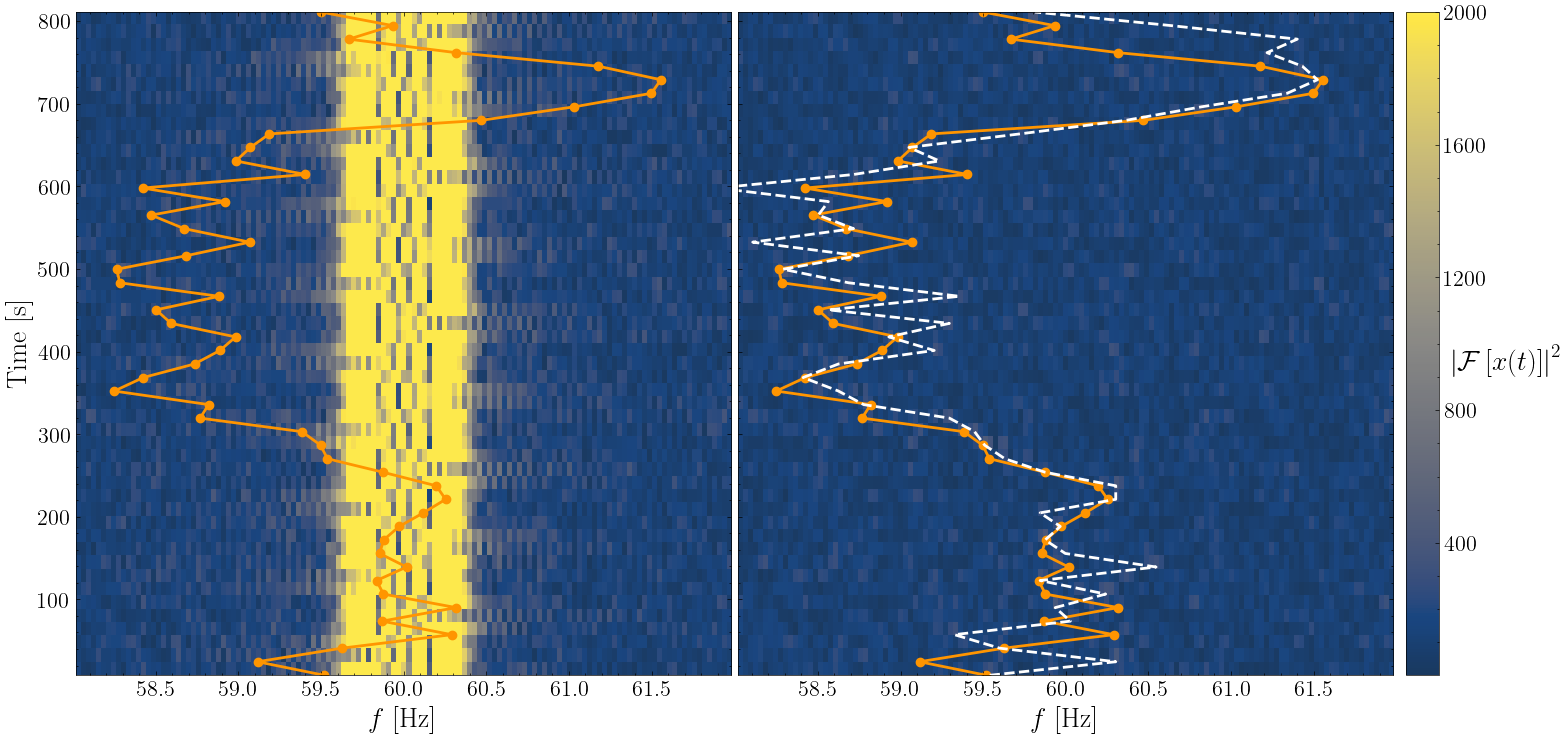

In [4]:
path1 = "../../data/fig_plot_8_and_9_viterbi_path_ANC_example_1.mat"
path2 = "../../data/fig_plot_8_and_9_viterbi_path_ANC_example_2.mat"

viterbi_with_pem,viterbi_without_pem,f,t,GW_freq_true,GW_freq_estim = load_data(path2)

##Low contrast
cbar_lower_limit = 1
cbar_upper_limit = 2000
plot_2d2(viterbi_with_pem.T,viterbi_without_pem.T,f,t,GW_freq_true,GW_freq_estim,cbar_lower_limit,cbar_upper_limit,fname='viterbi_tracking_canonical_single',reverse_ordering=True,cmap='cividis')

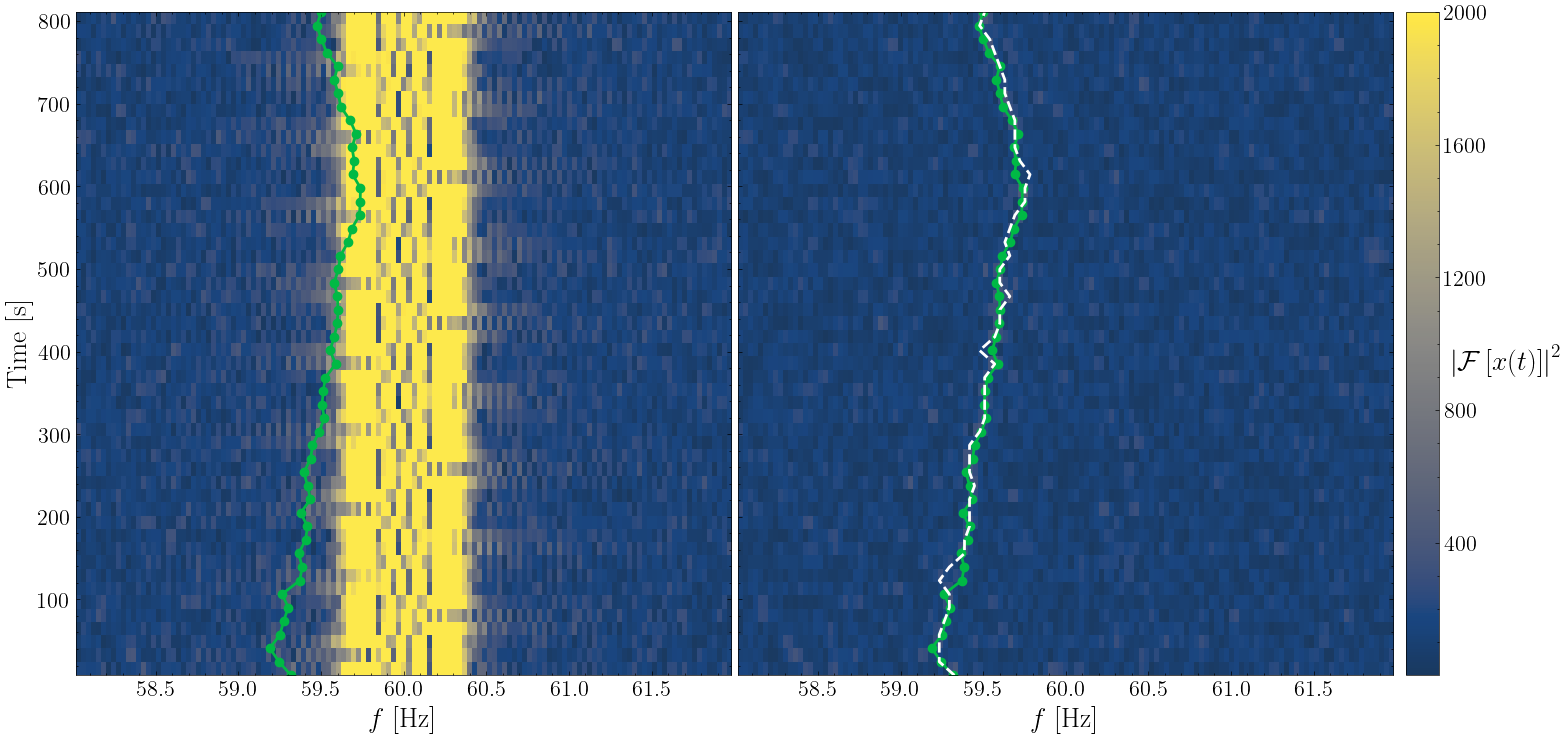

In [7]:
path1 = "../../data/fig_plot_8_and_9_viterbi_path_ANC_example_1.mat"
path2 = "../../data/fig_plot_8_and_9_viterbi_path_ANC_example_2.mat"

viterbi_with_pem,viterbi_without_pem,f,t,GW_freq_true,GW_freq_estim = load_data(path1)

##Low contrast
cbar_lower_limit = 1
cbar_upper_limit = 2000
plot_2d2(viterbi_with_pem.T,viterbi_without_pem.T,f,t,GW_freq_true,GW_freq_estim,cbar_lower_limit,cbar_upper_limit,fname='viterbi_tracking_canonical_single',reverse_ordering=True,cmap='cividis',linecolor='C1')

These are the data files: